In [1]:
# Python
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns

/Users/charlesreinertson/Desktop/School/grad/DATA512/Homeworks/env512/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df_mask_use = pd.read_csv('mask-use-by-county.csv')
df_mask_use

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [3]:
df_cases = pd.read_csv('RAW_us_confirmed_cases.csv')
df_cases

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18452,18452,18480,18480,18480,18480,18480,18480,18480,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65819,65819,65895,65895,65895,65895,65895,65895,65895,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6910,6910,6926,6926,6926,6926,6926,6926,6926,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7547,7547,7560,7560,7560,7560,7560,7560,7560,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17256,17256,17286,17286,17286,17286,17286,17286,17286,17320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,...,11800,11800,11800,11800,11800,11800,11800,11814,11814,11814
3338,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,...,6176,6176,6176,6176,6176,6176,6176,6186,6186,6186
3339,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,...,2669,2669,2669,2669,2669,2669,2669,2672,2672,2672


In [4]:
df_mandates = pd.read_csv('U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')
df_mandates

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1593864,VI,St. Thomas Island,78,30,8/11/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593865,VI,St. Thomas Island,78,30,8/12/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593866,VI,St. Thomas Island,78,30,8/13/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593867,VI,St. Thomas Island,78,30,8/14/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."


# Thank you Arik for this block of code

In [5]:
df_cases = df_cases[(df_cases["Province_State"] == "Michigan") & (df_cases["Admin2"] == "Wayne")]

In [6]:
#first 12 columns are general info about the state
mich_general_info = df_cases[df_cases.columns[0:11]]
mich_general_info

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key
1367,Michigan,Wayne,84026163,US,USA,840,26163.0,US,42.280984,-83.281255,"Wayne, Michigan, US"


In [7]:
# this is useful later
MICHIGAN_FIPS = mich_general_info["FIPS"].values[0]

In [8]:
# lets take all the columns with cases by date and pivot the table + make the date its own column.
mich_cases_by_date =  df_cases[df_cases.columns[11:]]
mich_cases_by_date = pd.DataFrame(mich_cases_by_date.iloc[0])
mich_cases_by_date = mich_cases_by_date.reset_index()
mich_cases_by_date.columns = ["date", "cases"]
mich_cases_by_date

,date,cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
1005,10/23/22,495129
1006,10/24/22,495129
1007,10/25/22,497474
1008,10/26/22,497474


In [9]:
mich_mask_use_july2_july14_2020 = df_mask_use[df_mask_use['COUNTYFP'] == MICHIGAN_FIPS]
mich_mask_use_july2_july14_2020

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1312,26163,0.046,0.032,0.075,0.156,0.69


In [10]:
mich_mask_mandates_april_2020_aug_2021 = df_mandates[(df_mandates["State_Tribe_Territory"] == "MI") &\
     (df_mandates['County_Name'] == 'Wayne County')]

In [11]:
# lets set N/A values from before mandates came into effect to no. Technically people were not required to wear masks when covid did not exist in the state, no works here.
mich_mask_mandates_april_2020_aug_2021["Face_Masks_Required_in_Public"] = mich_mask_mandates_april_2020_aug_2021["Face_Masks_Required_in_Public"].fillna("No")
mich_mask_mandates_april_2020_aug_2021

/var/folders/7p/l05mc6w14g702y6kyl3xjr380000gn/T/ipykernel_12464/3483604072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mich_mask_mandates_april_2020_aug_2021["Face_Masks_Required_in_Public"] = mich_mask_mandates_april_2020_aug_2021["Face_Masks_Required_in_Public"].fillna("No")


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
349148,MI,Wayne County,26,163,4/10/2020,2,No,NaN,NaN,NaN
349149,MI,Wayne County,26,163,4/11/2020,2,No,NaN,NaN,NaN
349150,MI,Wayne County,26,163,4/12/2020,2,No,NaN,NaN,NaN
349151,MI,Wayne County,26,163,4/13/2020,2,No,NaN,NaN,NaN
349152,MI,Wayne County,26,163,4/14/2020,2,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1158661,MI,Wayne County,26,163,8/11/2021,2,No,Official,https://www.michigan.gov/documents/coronavirus...,"Mich. Health Order (June 17, 2021)"
1158662,MI,Wayne County,26,163,8/12/2021,2,No,Official,https://www.michigan.gov/documents/coronavirus...,"Mich. Health Order (June 17, 2021)"
1158663,MI,Wayne County,26,163,8/13/2021,2,No,Official,https://www.michigan.gov/documents/coronavirus...,"Mich. Health Order (June 17, 2021)"
1158664,MI,Wayne County,26,163,8/14/2021,2,No,Official,https://www.michigan.gov/documents/coronavirus...,"Mich. Health Order (June 17, 2021)"


# Change cases from cumulative to new cases for each day

In [12]:
mich_cases_by_date['cases'] = mich_cases_by_date['cases'] - mich_cases_by_date.shift(periods=1)['cases']
mich_cases_by_date = mich_cases_by_date.fillna(0)
mich_cases_by_date

,date,cases
0,1/22/20,0.0
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
1005,10/23/22,0.0
1006,10/24/22,0.0
1007,10/25/22,2345.0
1008,10/26/22,0.0


# Windowing data
Case numbers are not always reported for an indidual day and that count is added to subsqeuent days. I will smooth the graph by taking the average of a three day window for each day

In [13]:
mich_cases_by_date['cases'] = mich_cases_by_date['cases'].rolling(3).mean()
mich_cases_by_date = mich_cases_by_date.fillna(0)

# How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 1, 2021?

In [14]:
mich_cases_by_date = mich_cases_by_date.rename(columns={"date": "ds", "cases": "y"})
mich_cases_by_date

,ds,y
0,1/22/20,0.000000
1,1/23/20,0.000000
2,1/24/20,0.000000
3,1/25/20,0.000000
4,1/26/20,0.000000
...,...,...
1005,10/23/22,0.000000
1006,10/24/22,0.000000
1007,10/25/22,781.666667
1008,10/26/22,781.666667


### Time series showing the changes in the derivative function of the rate of infection. Your graph should indicate days where masking policies were in effect (or not) and whether the difference in the derivative function was significant

In [15]:
df_grad = pd.DataFrame()
df_grad["date"] = pd.to_datetime(mich_cases_by_date["ds"])
df_grad["case_rate"] = pd.Series(np.gradient(mich_cases_by_date["y"]), mich_cases_by_date["ds"], name='case_rate').values
holder = mich_mask_mandates_april_2020_aug_2021[['date', 'Face_Masks_Required_in_Public']]
holder["date"] = pd.to_datetime(holder["date"])

/var/folders/7p/l05mc6w14g702y6kyl3xjr380000gn/T/ipykernel_12464/3513608182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holder["date"] = pd.to_datetime(holder["date"])


In [16]:
df_grad = df_grad.merge(holder, on='date', how='left').fillna("No")
df_grad['date'] = pd.to_numeric(df_grad['date'])
df_grad

,date,case_rate,Face_Masks_Required_in_Public
0,1579651200000000000,0.000000,No
1,1579737600000000000,0.000000,No
2,1579824000000000000,0.000000,No
3,1579910400000000000,0.000000,No
4,1579996800000000000,0.000000,No
...,...,...,...
1005,1666483200000000000,0.000000,No
1006,1666569600000000000,390.833333,No
1007,1666656000000000000,390.833333,No
1008,1666742400000000000,0.000000,No


Text(0.5, 1.0, 'Case Rate by Date')

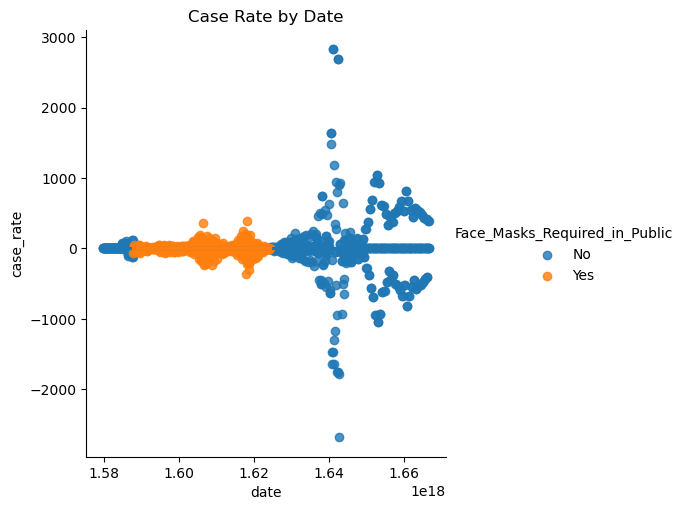

In [17]:
sns.lmplot(x='date', y='case_rate', data=df_grad, hue='Face_Masks_Required_in_Public')
plt.title('Case Rate by Date')

It is hard to discern from this plot whether masking policies change the derivative function in a meaningful way

### I also use Facebook Prophet to find the trend changepoints in the time series

In [18]:
m = Prophet(changepoint_prior_scale=0.5)
m.fit(mich_cases_by_date)

18:17:03 - cmdstanpy - INFO - Chain [1] start processing
18:17:04 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)

Text(0.5, 1.0, 'Trend Changepoints on Covid Cases by Date')

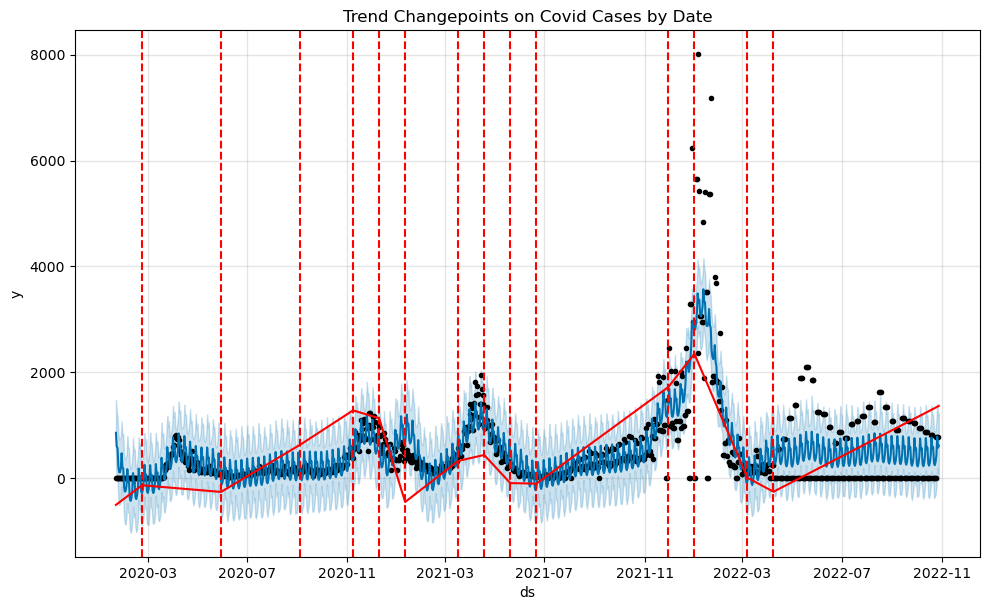

In [20]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title('Trend Changepoints on Covid Cases by Date')

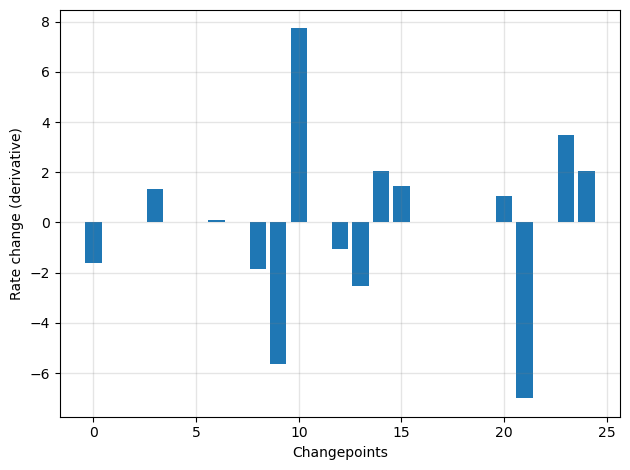

In [21]:
deltas = m.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change (derivative)')
ax.set_xlabel('Changepoints')
fig.tight_layout()

### Visualize the mask mandate progression

In [22]:
holder = mich_mask_mandates_april_2020_aug_2021[['date', 'Face_Masks_Required_in_Public']]

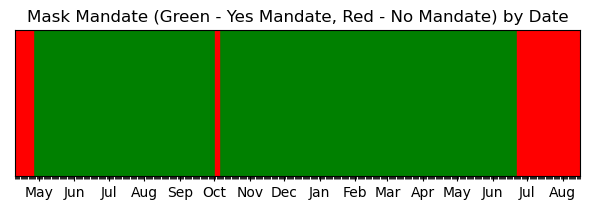

In [23]:
fig, ax= plt.subplots(figsize=(6,2))

# plot green for event==1
s1 = holder[holder['Face_Masks_Required_in_Public'] == 'Yes']
inxval = matplotlib.dates.date2num(pd.to_datetime(s1.date))
times= list(zip(inxval, np.ones(len(s1))))
plt.broken_barh(times, (-1,1), color="green")
# plot red for event==0
s2 = holder[holder['Face_Masks_Required_in_Public'] == 'No']
inxval = matplotlib.dates.date2num(pd.to_datetime(s2.date))
times= list(zip(inxval, np.ones(len(s2))))
plt.broken_barh(times, (-1,1), color="red")

#format axes
ax.margins(0)
ax.set_yticks([])
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
monthFmt = matplotlib.dates.DateFormatter("%b")
ax.xaxis.set_major_formatter(monthFmt)
plt.tight_layout()
plt.title('Mask Mandate (Green - Yes Mandate, Red - No Mandate) by Date')
plt.show()

# Summary
We can see that masking mandates were applied around May 1st (5/1/2020) and then briefly stopped of the beginning of October (10/1/2020 - 10/5/2020). Lastly, masking mandades stopped altogether in late June (6/20/2022)

We can see around May 1st there is a steady drop in cases which can lead us to theorize that the masking mandate decreased covid cases. In the beginning of October when the masking mandate were briefly lifted we also see a spike in covid cases. However, when the masking mandates was finally lifted we do not see a distinct changepoint so we can not theorize that covid cases increased with this lifted mask mandate.